<a href="https://colab.research.google.com/github/jerimiel/Machine-learning-projects/blob/main/Multivariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('drive')

Mounted at drive


In [ ]:
!mkdir ~/.kaggle
!cp drive/MyDrive/kaggle/kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d aungpyaeap/fish-market

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 2.14MB/s]


In [ ]:
!unzip fish-market.zip

Archive:  fish-market.zip
  inflating: Fish.csv                


In [ ]:
import pandas as pd
data=pd.read_csv('Fish.csv')

In [ ]:
data.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width,area
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,102.10800
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,113.23728
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,124.44665
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,129.20950
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,148.88600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
data['area']=data.Length2*data.Width

Length2 and Width can be engineered into area wich captures information from the two features.

In [ ]:
data.corrwith(data.Length1)

Weight     0.915712
Length1    1.000000
Length2    0.999517
Length3    0.992031
Height     0.625378
Width      0.867050
area       0.956661
dtype: float64

In [ ]:
#Due to correlation between Length1 and Length3 pick one feature of the two

In [ ]:
x=data[['Length1','Length3','area','Height']]
y=data['Weight']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

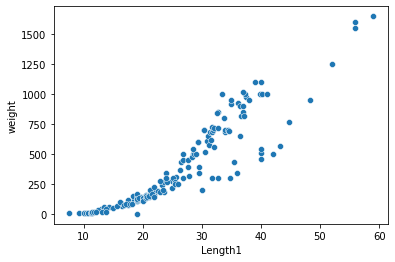

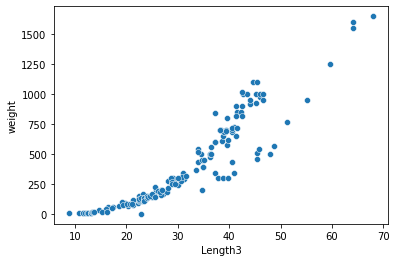

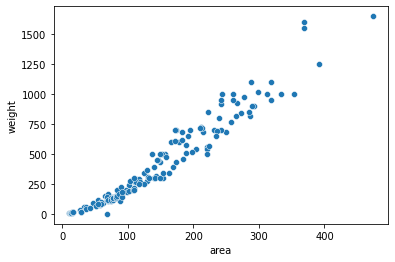

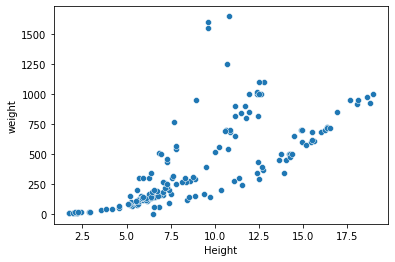

In [ ]:
cols=x.columns
j=1
for i in cols:
 
    sns.scatterplot(x=x[i],y=y)
    plt.xlabel(i)
    plt.ylabel('weight')
    plt.show()
    j=j+1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lr=LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [ ]:
cv=cross_val_score(lr,x,y,cv=3)

In [ ]:
np.mean(cv)

0.8878291744756489

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
pred=lr.predict(xtest)

In [ ]:
r2_score(pred,ytest)

0.945951121966005